# Multi Linear Regression

Q1) Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as smf
import statsmodels.formula.api as sm
import scipy.stats as stats

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"50_Startups.csv")
print("Shape:",data.shape)
data.head()

Shape: (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA and Data Visualization

In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 no

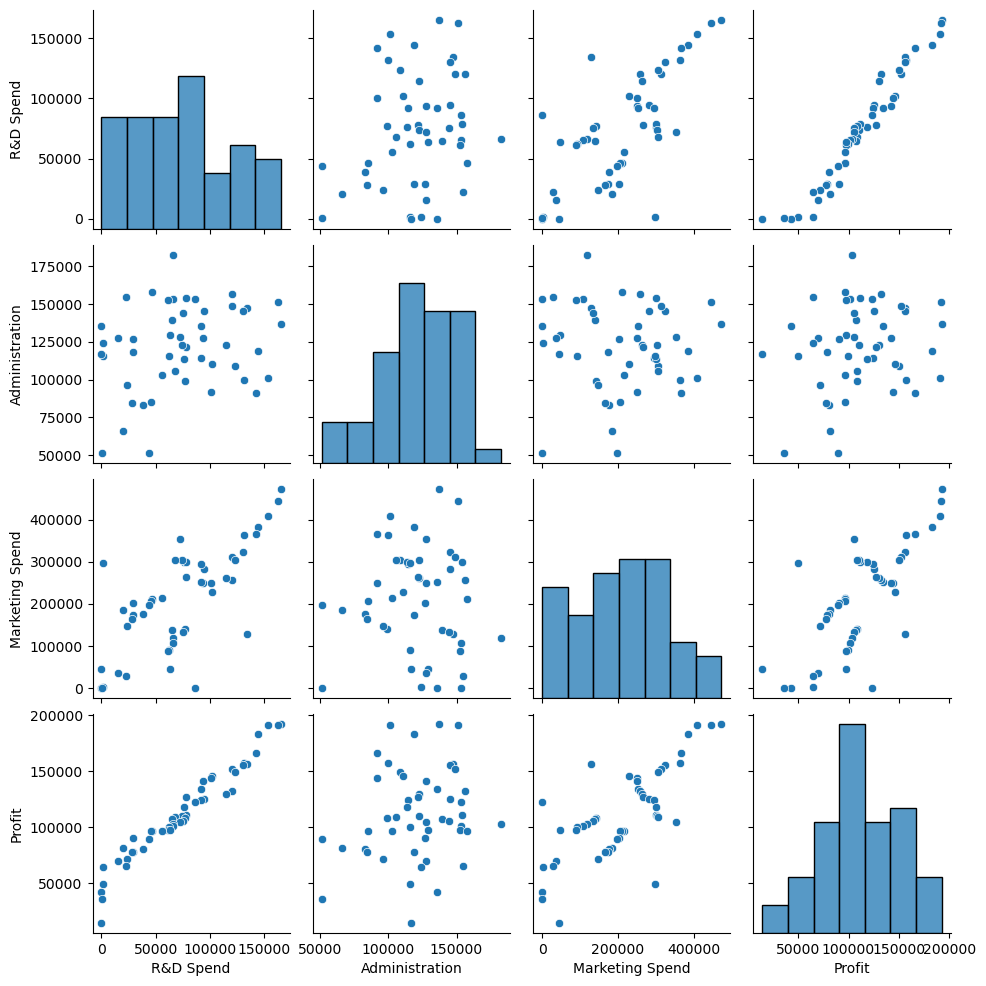

In [5]:
sns.pairplot(data= data)
plt.show()

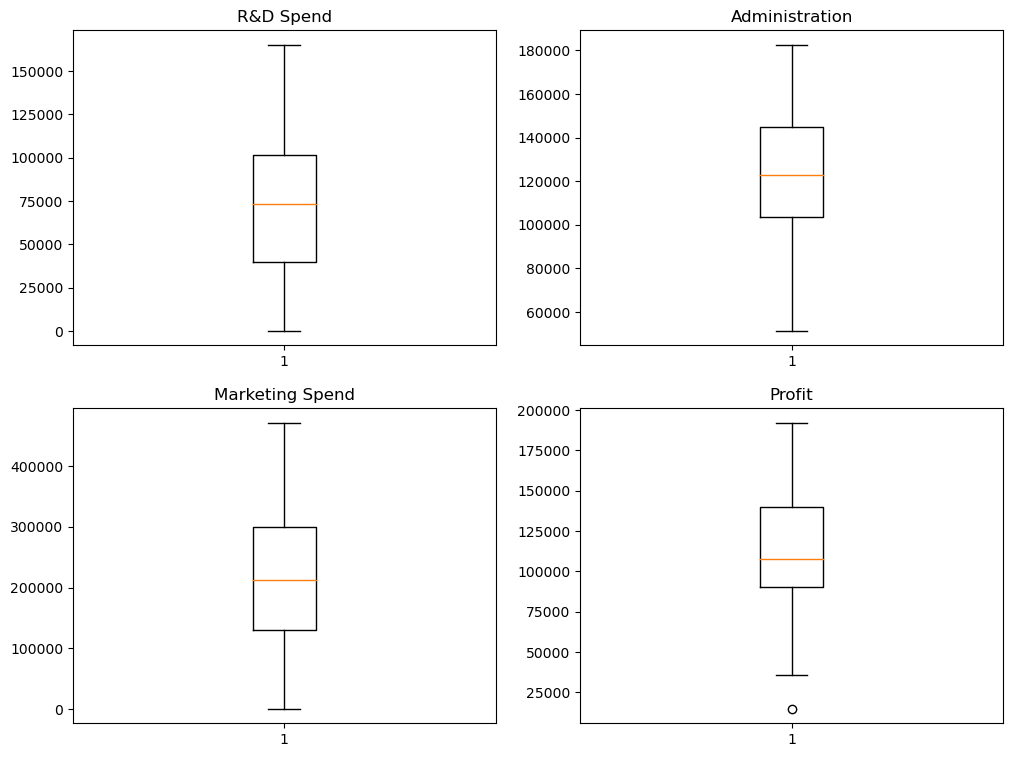

In [6]:
# display boxplots
plt.subplots(figsize = (12,9))
plt.subplot(221)   #represents the number of rows in the grid, the number of columns in the grid and the position of the subplot in the grid 
plt.boxplot(data['R&D Spend'])
plt.title('R&D Spend')
plt.subplot(222)
plt.boxplot(data['Administration'])
plt.title('Administration')
plt.subplot(223)
plt.boxplot(data['Marketing Spend'])
plt.title('Marketing Spend')
plt.subplot(224)
plt.boxplot(data['Profit'])
plt.title('Profit')
plt.show()

### Treating outliers with IQR
profit have outlier

    R&D Spend  Administration  Marketing Spend       State   Profit
49        0.0        116983.8         45173.06  California  14681.4

Shape of new data: (50, 5)


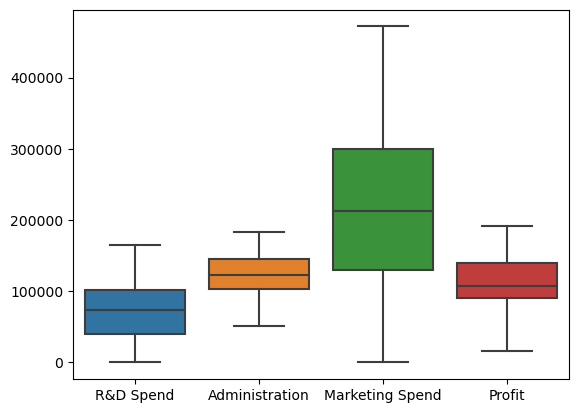

In [7]:
# treating outliers with IQR
q1 = data['Profit'].quantile(0.25)
q3 = data['Profit'].quantile(0.75)
IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

#detect outliers
print(data[(data['Profit'] > upper_bound) | (data['Profit'] < lower_bound)])

# Changing the outliers
new_data = data.copy()
new_data.loc[(new_data['Profit'] > upper_bound), 'Profit'] = upper_bound
new_data.loc[(new_data['Profit'] < lower_bound), 'Profit'] = lower_bound
print("\nShape of new data:",new_data.shape)
sns.boxplot(data = new_data)
plt.show()

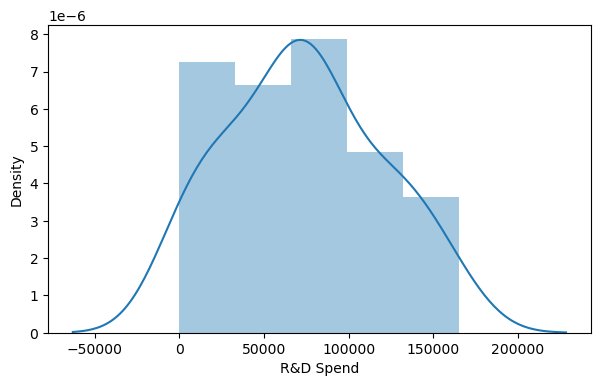

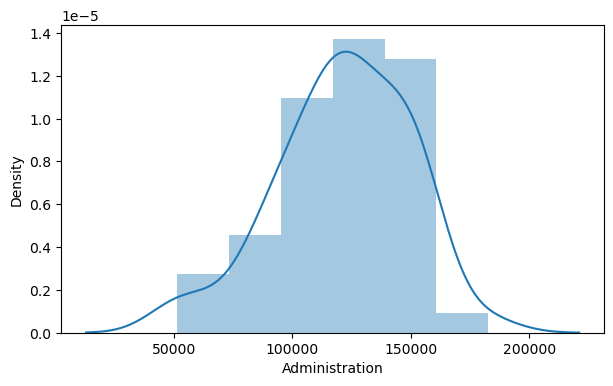

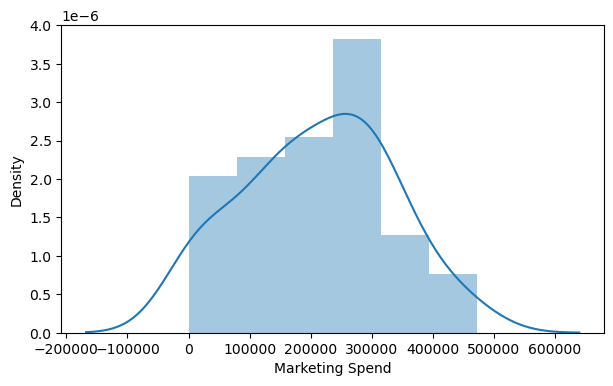

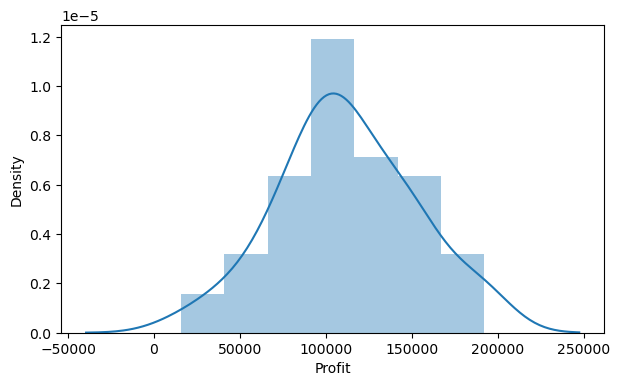

In [8]:
#  distribution plot
plt.figure(figsize = (7,4))
sns.distplot(new_data['R&D Spend'], kde = True)
plt.show()
plt.figure(figsize = (7,4))
sns.distplot(new_data['Administration'],hist = True)
plt.show()
plt.figure(figsize = (7,4))
sns.distplot(new_data['Marketing Spend'], kde = True)
plt.show()
plt.figure(figsize = (7,4))
sns.distplot(new_data['Profit'], kde = True)
plt.show()

### Labelencoder to convert categorical data into numeric

In [9]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
new_data['State'] = Label.fit_transform(new_data['State'])
new_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## Correlation Analysis

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


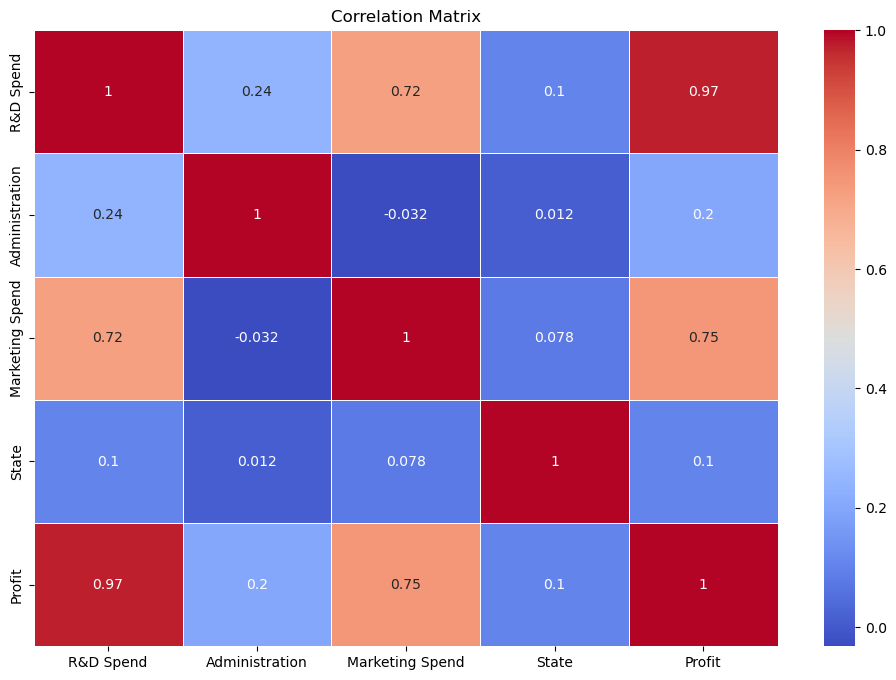

In [10]:
df = data.drop('State', axis=1)
print(df.corr())

corr_matrix = new_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Note: Profit more related to 'R&D spent' and 'Marketing Spend'

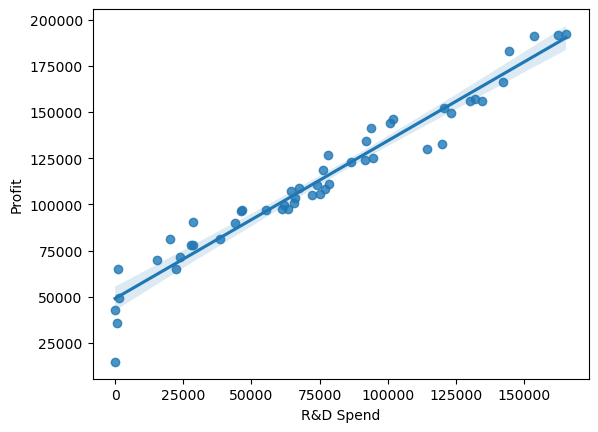

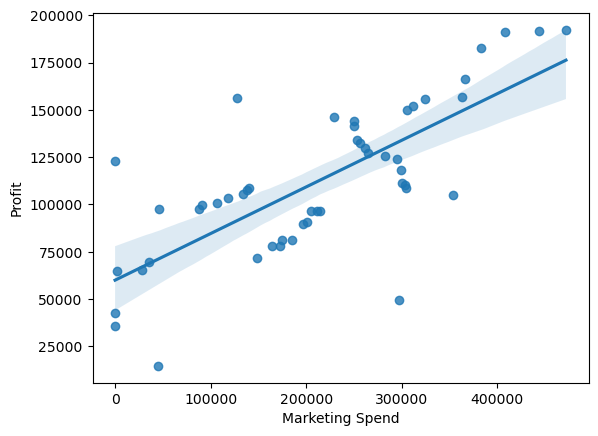

In [11]:
# Data visualizing 
sns.regplot(x=data['R&D Spend'],y=data['Profit'])
plt.show()
sns.regplot(x=data['Marketing Spend'],y=data['Profit'])
plt.show()

### Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
std1 = StandardScaler()
std2 = StandardScaler()
new_data_norm=new_data.copy()
new_data_norm[['R&D Spend','Administration','Marketing Spend']] = std1.fit_transform(new_data[['R&D Spend','Administration','Marketing Spend']])
new_data_norm[['Profit']] = std2.fit_transform(new_data[['Profit']])   #Scaling output data also
print(new_data_norm.head())

   R&D Spend  Administration  Marketing Spend  State    Profit
0   2.016411        0.560753         2.153943      2  2.013185
1   1.955860        1.082807         1.923600      0  2.001397
2   1.754364       -0.728257         1.626528      1  1.982787
3   1.554784       -0.096365         1.422210      2  1.778319
4   1.504937       -1.079919         1.281528      1  1.358912


# Model Building  & Testing

### Based on SK learn LR  using standard Scalar Data

In [13]:
# Initialize model
regression_model = linear_model.LinearRegression()

X=new_data_norm.iloc[:,0:4]
y=new_data_norm.iloc[:,4]

# Train the model using the mtcars data
regression_model.fit(X = X, y = y)

# Check trained model y-intercept
print("y-intercept:",regression_model.intercept_)

# Check trained model coefficients
print("model coefficients:",regression_model.coef_)

# Check regression_model.score
score1=regression_model.score(X = X, y = y)
print("score:",score1)

y-intercept: 0.0012108835177902896
model coefficients: [ 0.91810034 -0.01858829  0.08254066 -0.00121088]
score: 0.9514716379797403


In [14]:
# Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):
predictions = regression_model.predict(X=X)
predictions = std2.inverse_transform(predictions.reshape(-1, 1))
mse1 = mean_squared_error(new_data['Profit'], predictions)
rmse = np.sqrt(mse1)
print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 77070690.40689442
Root Mean Squared Error: 8778.991423101768


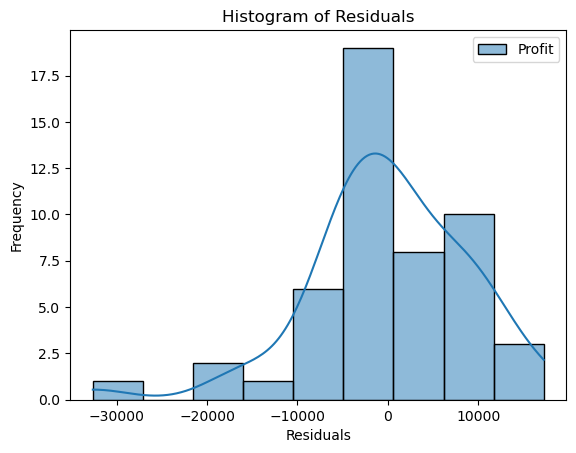

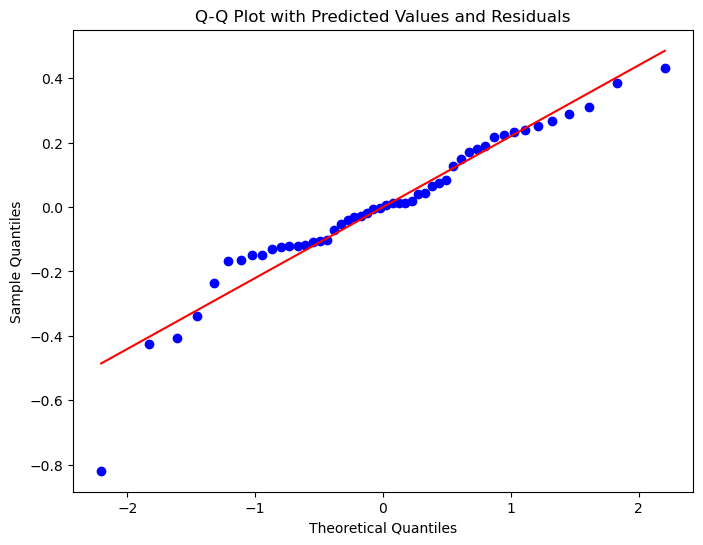

In [15]:
# Residual Analysis
residuals = pd.DataFrame(new_data['Profit']) - predictions

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Calculate quantiles for residuals and expected quantiles for a normal distribution
residuals_quantiles = np.percentile(residuals, np.arange(0, 100, 1))
expected_quantiles = stats.norm.ppf(np.arange(0, 100, 1) / 100.0, loc=np.mean(residuals), scale=np.std(residuals))

# Create a Q-Q plot with predicted values and residuals
pred = regression_model.predict(X=X)
residuals = y - pred
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot with Predicted Values and Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

### statsmodels for linear regression  (using without scalar data)

In [16]:
dataset=new_data.rename({'R&D Spend':'RD_Spend', 'Marketing Spend':'Marketing_Spend'},axis=1)
# Fit the model
model = sm.ols(formula='Profit ~ RD_Spend+Administration+Marketing_Spend+State', data=dataset).fit()

# Print model summary
print(model.summary())

# Check model parameters
print("Parameters:")
print(model.params)

X=dataset.iloc[:,0:4]
y=dataset.iloc[:,4]

# Predictions
predictions = model.predict(X)
# print("Predictions:")
# print(predictions)

# Residuals
residuals = y - predictions
# print("Residuals:")
# print(residuals)

# R-squared value
score2=model.rsquared
print("R-squared:", model.rsquared)

# Calculate Mean Squared Error
mse2 = mean_squared_error(y, predictions)
print("Mean Squared Error:", mse2)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           6.10e-29
Time:                        17:08:00   Log-Likelihood:                -524.95
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      45   BIC:                             1069.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.023e+04   6745.898     

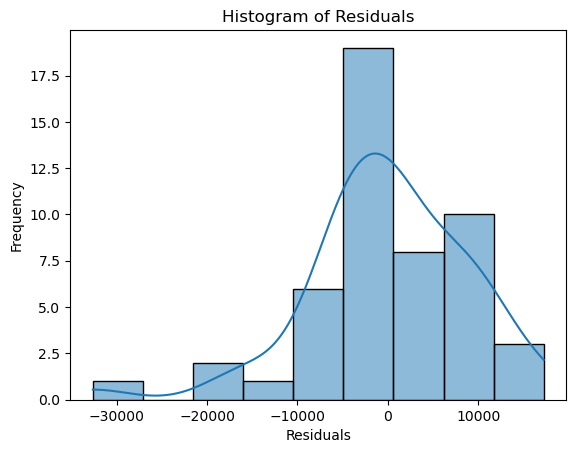

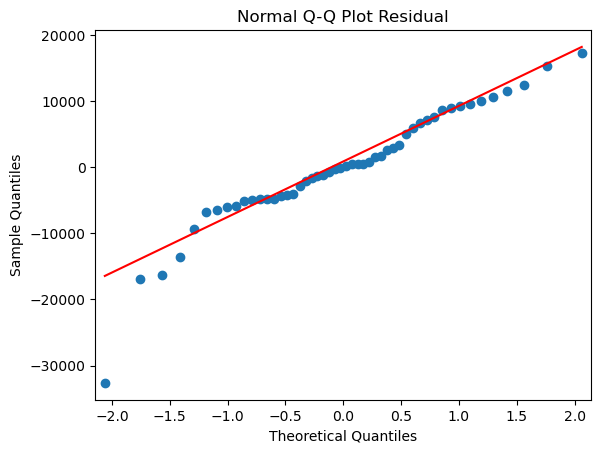

In [17]:
# Residuals
residuals = model.resid

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot 
import statsmodels.api as smf
qqplot = smf.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot Residual")
plt.show()

In [18]:
# Compare both method score, mse
print(score1,score2)
print(mse1,mse2)

0.9514716379797403 0.9514716379797403
77070690.40689442 77070690.40689436


Note: Both R_square & MSE values are same

### Normalizing features

In [19]:
# CustomScaler

#withoutNormalization
class withoutNormalization:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X 
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)

#Square
class SquareScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X ** 2 
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)
    
    
#Log
class LogScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log(X + 1)
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)


scaler_name: without normalization
score: 0.9514716379797403
mse: 77070690.40689439

scaler_name: Standard Scaler
score: 0.9514716379797403
mse: 77070690.40689443

scaler_name: MinMax Scaler
score: 0.9514716379797403
mse: 77070690.4068944

scaler_name: Square Transformation
score: 0.855297878263866
mse: 229809784.6552177

scaler_name: Log Transformation
score: 0.5353695069111937
mse: 737906481.8116122

 best_scaler: without normalization


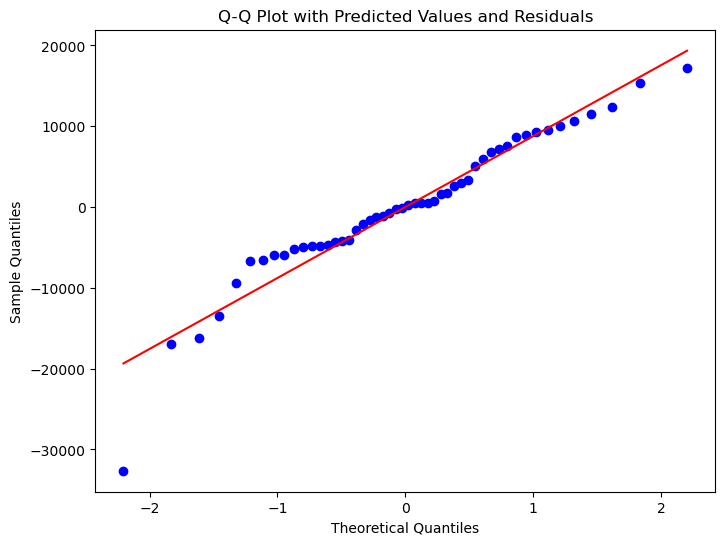

In [20]:
# Normalization to input data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X=new_data.iloc[:,0:4]
y=new_data.iloc[:,4]
X_train = X
X_test = X
y_train= y
y_test = y 

results = {}

scalers = {
    'without normalization': withoutNormalization(),
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    # 'Robust Scaler': RobustScaler(),
    # 'Log Transformation2': PowerTransformer(method='box-cox'),
    'Square Transformation': SquareScaler(),
    'Log Transformation': LogScaler(),
}

for scaler_name, scaler in scalers.items():
    print("\nscaler_name:",scaler_name)
 
    X_train_scaled =X_train.copy()   
    X_train_scaled.iloc[:, 0:3] = scaler.fit_transform(X_train_scaled.iloc[:,0:3])
    
    X_test_scaled =X_test.copy()
    X_test_scaled.iloc[:, 0:3] = scaler.transform(X_test_scaled.iloc[:,0:3]) 
    
    regression_model = LinearRegression()
    regression_model.fit(X_train_scaled, y_train)
    
    # Check regression_model.score
    score=regression_model.score(X = X_train_scaled, 
                       y = y_train)
    print("score:",score)
    
    predictions = regression_model.predict(X_test_scaled)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    print("mse:",mse)

    results[scaler_name] = {'model': regression_model, 'predictions': predictions, 'mse': mse}
    
# Choose the best model based on mse
best_scaler = min(results, key=lambda x: results[x]['mse']); print("\n best_scaler:", best_scaler)
best_model = results[best_scaler]['model']   
best_predictions = results[best_scaler]['predictions']

# Create a Q-Q plot with predicted values and residuals
residuals = y_test - best_predictions
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot with Predicted Values and Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

The best model is obtained using the without normalization. (95.14 % Accuracy) (MinMax Scaler normalisation, Standard Scaler also giving best model)

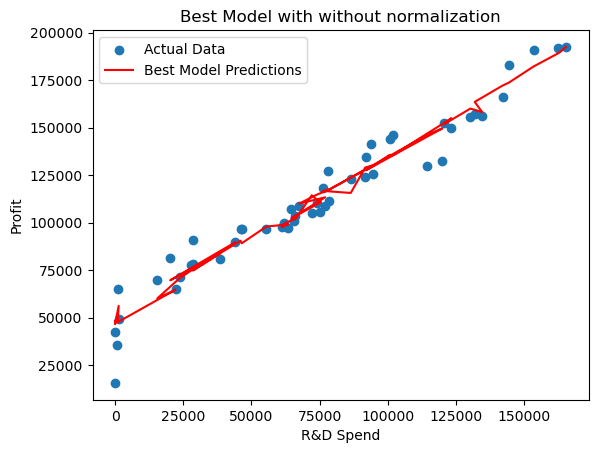

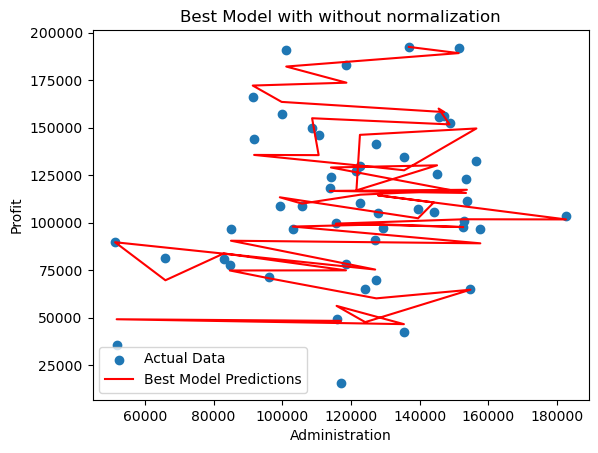

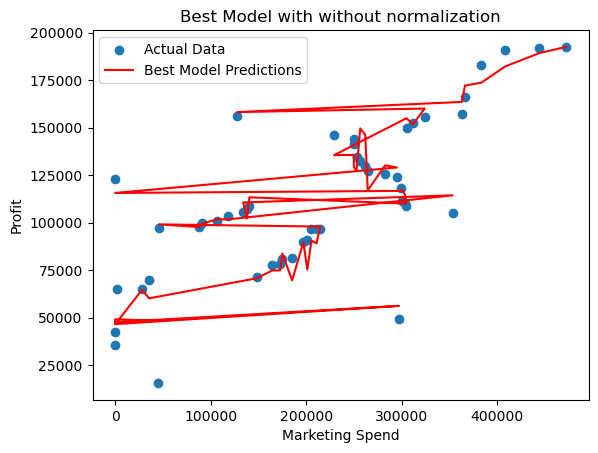

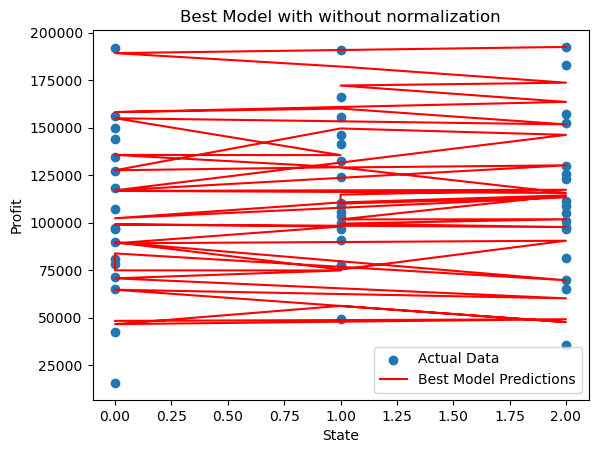

In [21]:
# Visualize the best model's predictions

# R&D Spend - Profit
plt.scatter(X_test['R&D Spend'], y_test, label='Actual Data')
plt.plot(X_test['R&D Spend'], best_predictions, label='Best Model Predictions', color='red')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.title(f'Best Model with {best_scaler}')
plt.show()

# Administration - Profit
plt.scatter(X_test['Administration'], y_test, label='Actual Data')
plt.plot(X_test['Administration'], best_predictions, label='Best Model Predictions', color='red')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.legend()
plt.title(f'Best Model with {best_scaler}')
plt.show()

# R&D Spend - Profit
plt.scatter(X_test['Marketing Spend'], y_test, label='Actual Data')
plt.plot(X_test['Marketing Spend'], best_predictions, label='Best Model Predictions', color='red')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.legend()
plt.title(f'Best Model with {best_scaler}')
plt.show()

# R&D Spend - Profit
plt.scatter(X_test['State'], y_test, label='Actual Data')
plt.plot(X_test['State'], best_predictions, label='Best Model Predictions', color='red')
plt.xlabel('State')
plt.ylabel('Profit')
plt.legend()
plt.title(f'Best Model with {best_scaler}')
plt.show()

In [22]:
# Final output comparison
X_scaled = X
# X_scaled.iloc[:,0:3] = MinMaxScaler().fit_transform(X.iloc[:,0:3])
predictions_new = best_model.predict(X_scaled)
data['Profit_pred']=pd.DataFrame(predictions_new,columns=['Profit'])

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Profit_pred
0,165349.20,136897.80,471784.10,New York,192261.83,192430.650923
1,162597.70,151377.59,443898.53,California,191792.06,189167.315359
2,153441.51,101145.55,407934.54,Florida,191050.39,182111.134909
3,144372.41,118671.85,383199.62,New York,182901.99,173620.504452
4,142107.34,91391.77,366168.42,Florida,166187.94,172110.817784


## Model Predictions

In [23]:
# New Data
X_new = data.iloc[0:10,0:4]
X_new1=X_new.copy()

X_new['State'] = Label.fit_transform(X_new['State'])   # Lable encounder
X_scaled = X_new.copy()
X_scaled.iloc[:,0:3] = MinMaxScaler().fit_transform(X_new.iloc[:,0:3]) #Max-Min transformation
predictions_new = best_model.predict(X_scaled)
predictions_new=pd.DataFrame(predictions_new,columns=['Profit'])

predicted = pd.concat([X_new1,predictions_new], axis=1)
predicted

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,50133.825758
1,162597.70,151377.59,443898.53,California,50230.279188
2,153441.51,101145.55,407934.54,Florida,50181.878415
3,144372.41,118671.85,383199.62,New York,50133.449925
4,142107.34,91391.77,366168.42,Florida,50181.675785
5,131876.90,99814.71,362861.36,New York,50133.232171
6,134615.46,147198.87,127716.82,California,50229.753240
7,130298.13,145530.06,323876.68,Florida,50181.436130
8,120542.52,148718.95,311613.29,New York,50133.002672
9,123334.88,108679.17,304981.62,California,50229.581678
